<a href="https://colab.research.google.com/github/DiyaKoranga/Bitcoin_Prediction/blob/main/BTC_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import yfinance as yf

In [7]:
df = yf.download('BTC-USD')
 #by this we get all the historical prices of bitcoin

[*********************100%***********************]  1 of 1 completed


In [8]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
#these are all important libraries

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
#90% is training datAset and 10% testing set
to_row = int(len(df)*0.9)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])

testing_data
#HERE WE DEFINED THE TESTING AND TRAINING DATASET

[42843.80078125,
 40693.67578125,
 43574.5078125,
 44895.09765625,
 42839.75,
 42716.59375,
 43208.5390625,
 42235.73046875,
 41034.54296875,
 41564.36328125,
 43790.89453125,
 48116.94140625,
 47711.48828125,
 48199.953125,
 49112.90234375,
 51514.8125,
 55361.44921875,
 53805.984375,
 53967.84765625,
 54968.22265625,
 54771.578125,
 57484.7890625,
 56041.05859375,
 57401.09765625,
 57321.5234375,
 61593.94921875,
 60892.1796875,
 61553.6171875,
 62026.078125,
 64261.9921875,
 65992.8359375,
 62210.171875,
 60692.265625,
 61393.6171875,
 60930.8359375,
 63039.82421875,
 60363.79296875,
 58482.38671875,
 60622.13671875,
 62227.96484375,
 61888.83203125,
 61318.95703125,
 61004.40625,
 63226.40234375,
 62970.046875,
 61452.23046875,
 61125.67578125,
 61527.48046875,
 63326.98828125,
 67566.828125,
 66971.828125,
 64995.23046875,
 64949.9609375,
 64155.94140625,
 64469.52734375,
 65466.83984375,
 63557.87109375,
 60161.24609375,
 60368.01171875,
 56942.13671875,
 58119.578125,
 59697.195

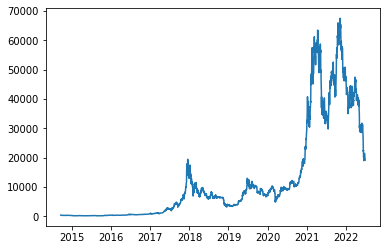

In [10]:
plt.plot(df.index, df['Adj Close'])
plt.show()
#graph of bitcoin prices

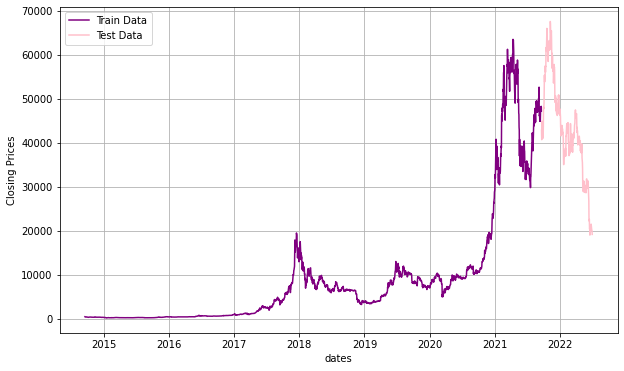

In [11]:
#split data into train and training set IN GRAPHICAL FORMAT
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'purple', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'pink', label='Test Data')
plt.legend()
#WE ARE USING MATPLOTLIB LIBRARY TO PLOT THIS GRAPH



In [12]:
model_predictions=[]
n_test_obser=len(testing_data)


In [13]:
#if i starts from 0 then as we go in future the historical window considered in arima model should be increasing so we will have to change the training set
#for all the iterations and then that will be used to predict the prices 
for i in range(n_test_obser):
  model = ARIMA(training_data,order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  print(output)
  break

(array([47380.37041673]), array([676.84438815]), array([[46053.77979281, 48706.96104064]]))


In [14]:
list(output[0])[0] #yhat --> it represents the predicted value of y

47380.37041672822

In [15]:
for i in range(n_test_obser):
  model = ARIMA(training_data,order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)
  

In [16]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2843
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -23059.138
Method:                       css-mle   S.D. of innovations            805.858
Date:                Fri, 01 Jul 2022   AIC                          46130.277
Time:                        12:28:16   BIC                          46165.992
Sample:                             1   HQIC                         46143.159
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7982     15.672      0.434      0.664     -23.917      37.514
ar.L1.D.y     -0.0283      0.019     -1.509      0.131      -0.065       0.008
ar.L2.D.y      0.0050      0.019      0.267      0.7

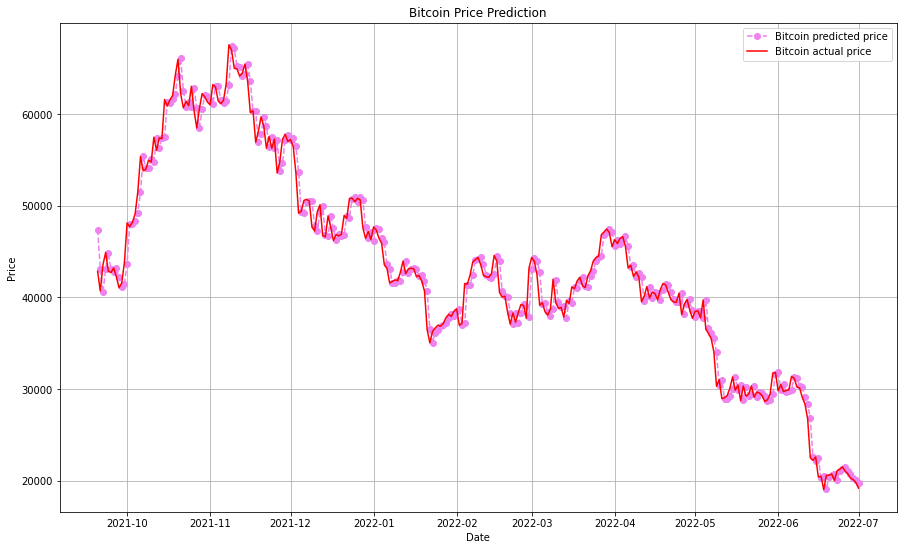

In [21]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:], color = 'violet', marker = 'o', linestyle = 'dashed', label = 'Bitcoin predicted price')
plt.plot(date_range,testing_data, color = 'red', label = 'Bitcoin actual price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
l=len(np.array(model_predictions))
print("Bitcoin predicted price")
print(np.array(model_predictions[l-1]))

Bitcoin predicted price
19778.818811874527


In [23]:
#report performance
mape = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape)) #mean absoulte percentage error
#around 2.6 % mape impiles that the model is 97.4% accurate in predicting the test set observation


MAPE: 0.026812641204273433
